# Problem Statement

The data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Top 5 rows

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Last 5 Rows

In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Shape of dataset

In [5]:
print("No. of rows : ",df.shape[0])
print("No. of columns : ",df.shape[1])
pd.set_option('display.max_columns',None)


No. of rows :  32560
No. of columns :  15


# Descriptive Statistics 

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. Minimum age is 17yrs, maximum age is 90yrs, mean age is 38yrs.
2. Minimum capital gain is 0, Maximum capital gain is 99999.
3. Minimum capital loss is 0, maximum capital loss is 4356.
4. minimum hours per week is 1 and maximum hours per week is 99.

In [7]:
colllist = df.columns
colllist

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The dataset contains both numerical and categorical features.

# Let's check for Null values, whitespaces,'NA', '?', '-' 

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [15]:
df.isin([' ','-','NA']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The feature Workclass contains 1836 '?' values.
The feature Occupation contains 1843 '?' values.
The feature Native_country contains 583 '?' values.


No whitespaces are present.

# Let's replace '?' by NaN

In [16]:
df=df.replace(' ?',np.NaN)

# Lets check for duplicate entries

In [17]:
df.drop_duplicates(keep='last', inplace=True)

# Let's check for missing values now

In [18]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

# Let's seperate Numerical & Categorical Features

In [19]:
num = []
cat = []

for i in colllist:
    if df.dtypes[i]=='object':
        cat.append(i)
    
    else:
        num.append(i)

In [20]:
cat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [21]:
num

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

# Fill NaN values

In [22]:
# Since all the features having NaN values are categorical type features we will impute null values with mode.
df['Workclass'] = df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country'] = df['Native_country'].fillna(df['Native_country'].mode()[0])


# Let's check if NaN's are filled

In [23]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

It shows that all the null values are filled.

# Let's check for unique values & Value Counts in Categorical features

In [26]:
for c in cat:
    print(c)
    print(df[c].value_counts())
    print('*'*50)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
**************************************************
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
**************************************************
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse         

# Visualization

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

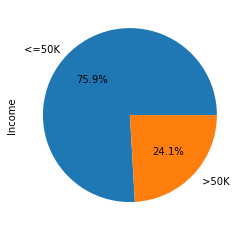

In [27]:
# Visualization of Income 

df['Income'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Income'].value_counts()

1. More than 75% of population having income <=50K.
2. Only 24% of population has income >50K.

This also means that our target variable is highly imbalanced and we have to balance it.

# Visualization of Age

In [28]:
df['Age'].value_counts()

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

Since there are too much variates in Age feature we will convert them into age-groups.
To define age groups first we need to find minimum and maximum age of population.

In [30]:
print("Minimum Age is ",df['Age'].min(),"years")
print("Maximum Age is ",df['Age'].max(),"years")


Minimum Age is  17 years
Maximum Age is  90 years


Since minimum age is 17 years and maximum age is 90 years we have to create age groups within this range.

In [31]:
def age_group(x):
    x = int(x)
    x = abs(x)
    
    if (17<= x < 31):
        return "17-30"
    
    if (31 <= x < 41):
        return "31-40"
    
    if (41 <= x < 51):
        return "41-50"
    
    if (51 <= x < 61):
        return "51-60"
    
    if (61 <= x < 71):
        return "61-70"
    
    else :
        return " Greater than 70"
    


In [32]:
df['age_group']=df['Age'].apply(age_group)

<AxesSubplot:xlabel='age_group', ylabel='count'>

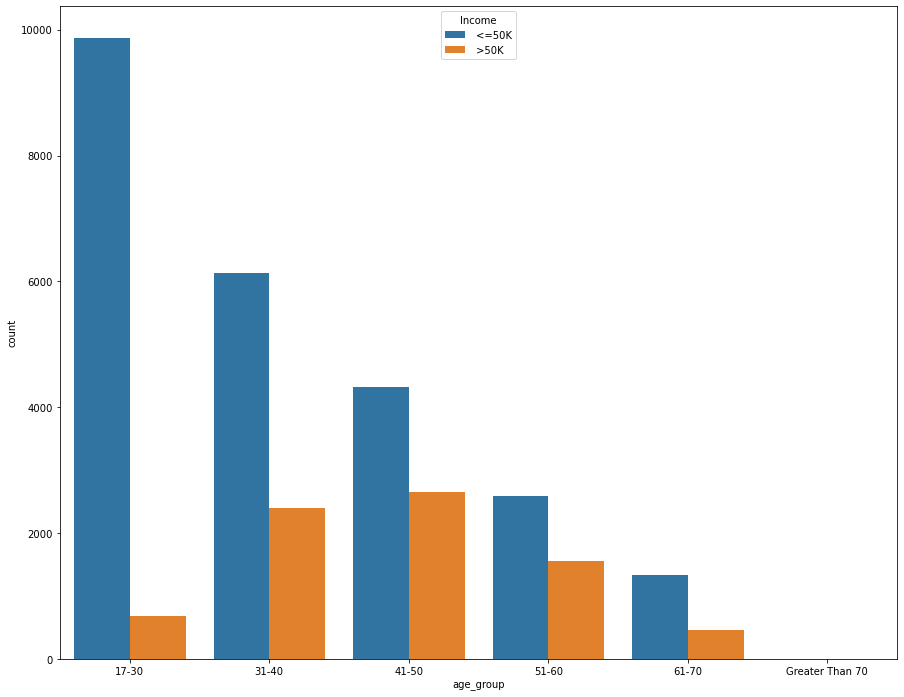

In [43]:
order_list = ['17-30','31-40','41-50','51-60','61-70','Greater Than 70']
plt.figure(figsize=(15,12))
sns.countplot(x='age_group',hue='Income',data=df,order=order_list)

1. The age group 17-30 has maximum of Income which is less than 50K
2. The agr group 41-50 hax maximum of >50K income

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

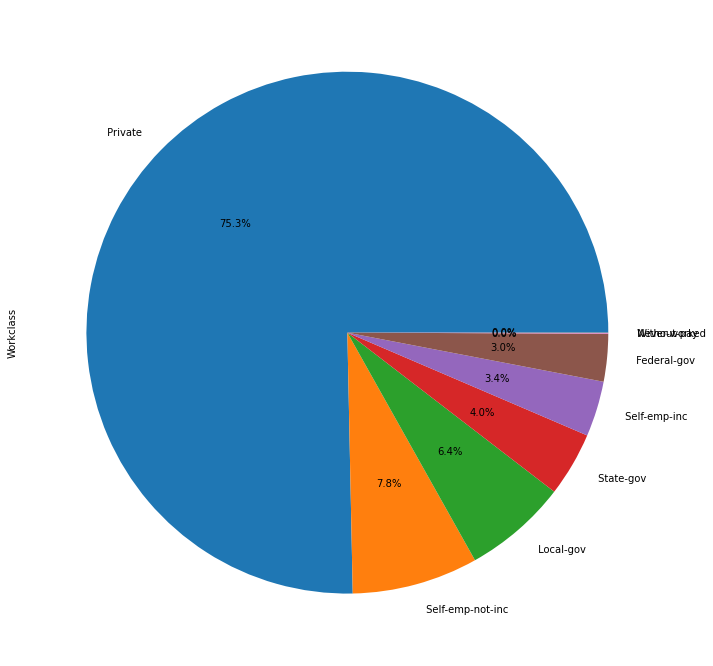

In [40]:
# Visualization of Workclass 
plt.figure(figsize=(15,12))
df['Workclass'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Workclass'].value_counts()

<AxesSubplot:xlabel='Workclass', ylabel='count'>

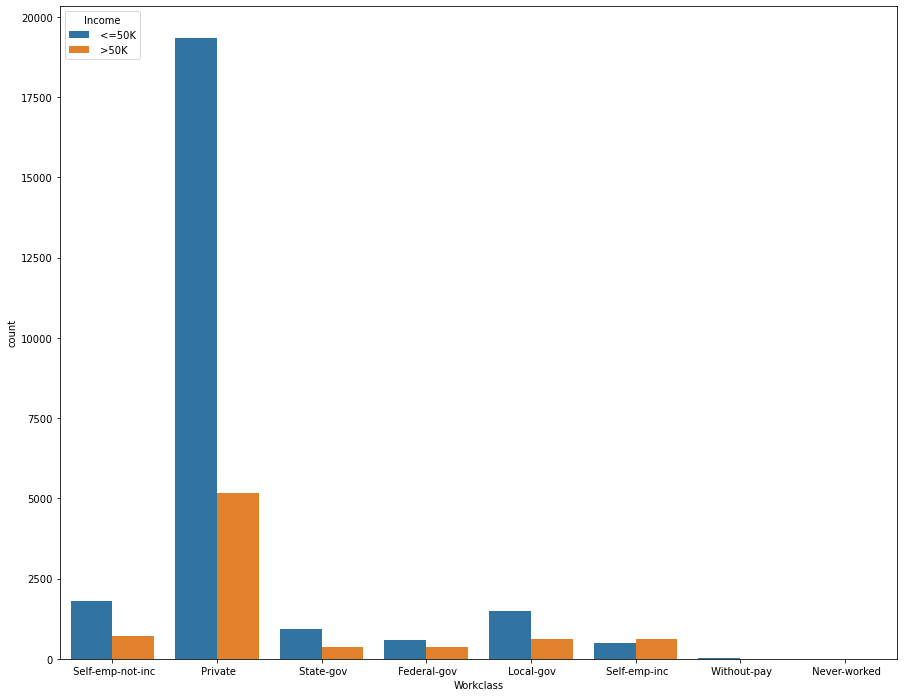

In [42]:
plt.figure(figsize=(15,12))
sns.countplot(x='Workclass',hue='Income',data=df)

Maximum of income less than and more than 50K belongs from private sector.


# Visualization of Education 

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

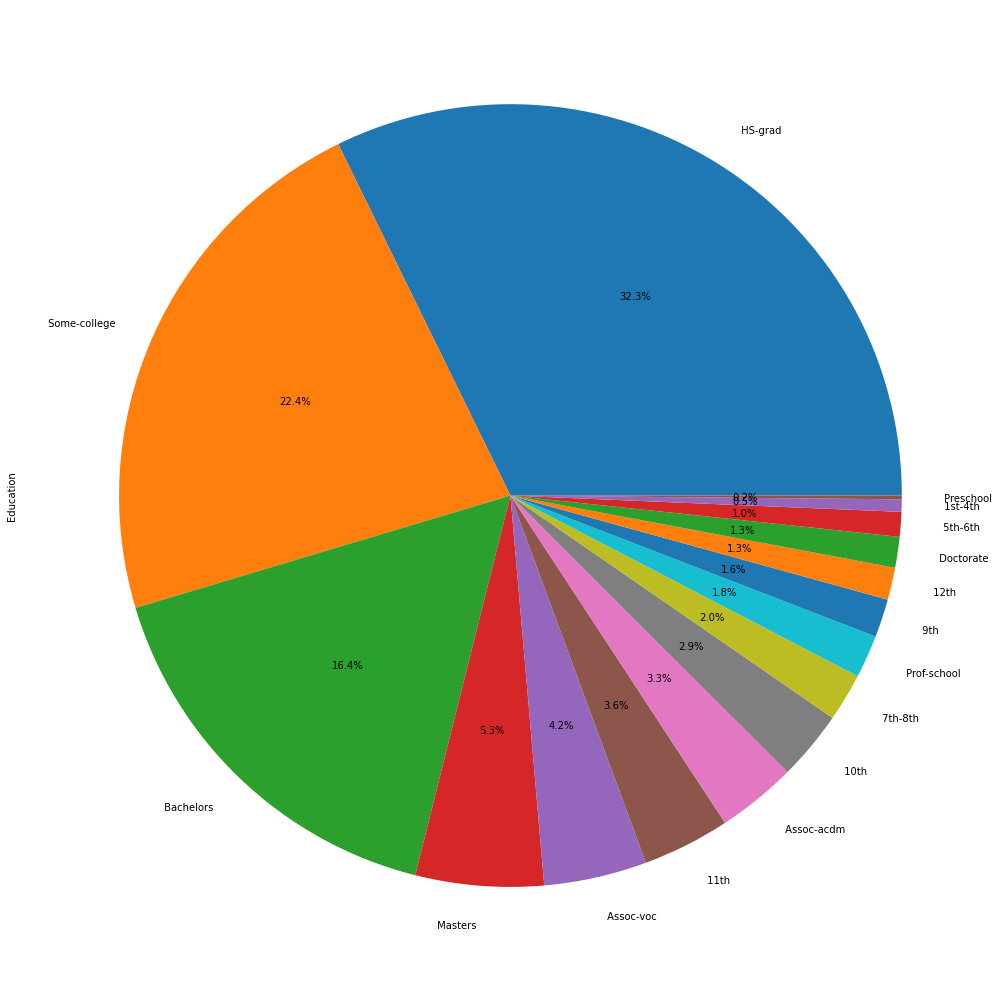

In [53]:
plt.figure(figsize=(20,18))
df['Education'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Education'].value_counts()

<AxesSubplot:xlabel='Education', ylabel='count'>

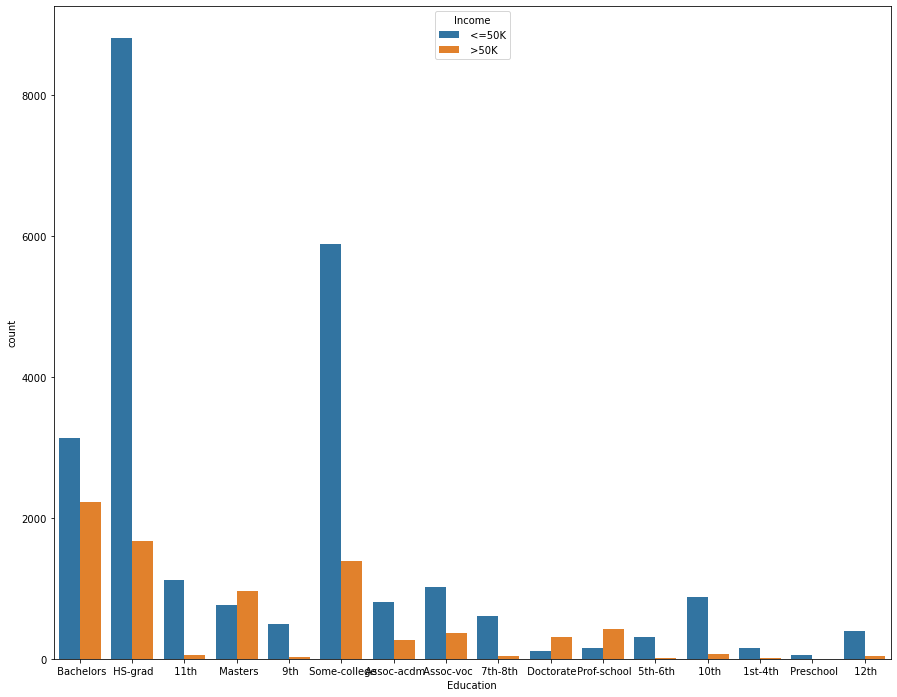

In [45]:
plt.figure(figsize=(15,12))
sns.countplot(x='Education',hue='Income',data=df)

1. Most of the people are with HS-grad eduaction followed by some-college.
2. There are very less people with Preschool eduaction.
3. Maximum of income less than amd more than 50K belongs to people with HS-grad eduaction followed by some-college.
4. Income in both category is very less for people with preschool education.

# Visualization of Marital Status 

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

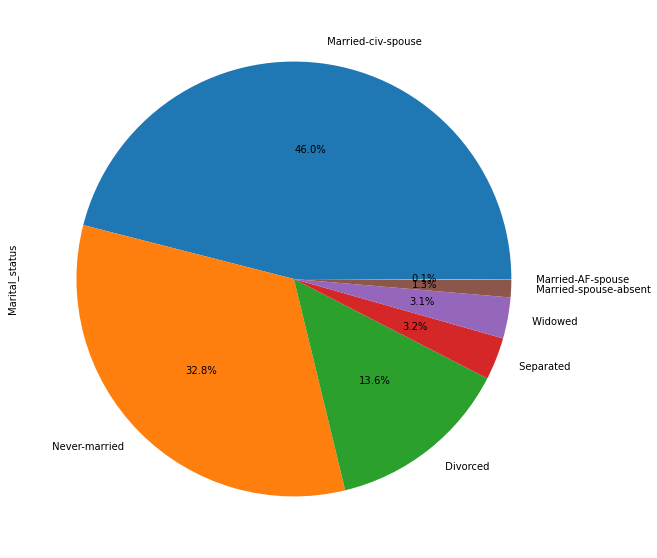

In [68]:
plt.figure(figsize=(15,10))
df['Marital_status'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Marital_status'].value_counts()

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

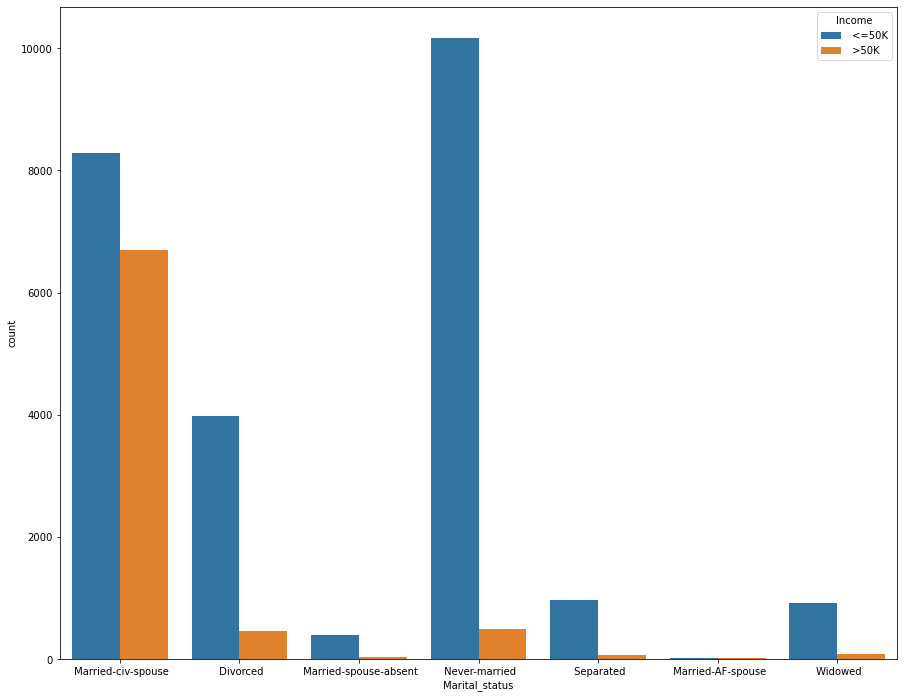

In [55]:
plt.figure(figsize=(15,12))
sns.countplot(x='Marital_status',hue='Income',data=df)

1. The number of people with Married-civ-spouse is very large followed by people Never-married.
2. people Married-AF-spouse are very less in number.
3. The income <= 50K is more for Never-married.

# Visualization of Occupation 

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

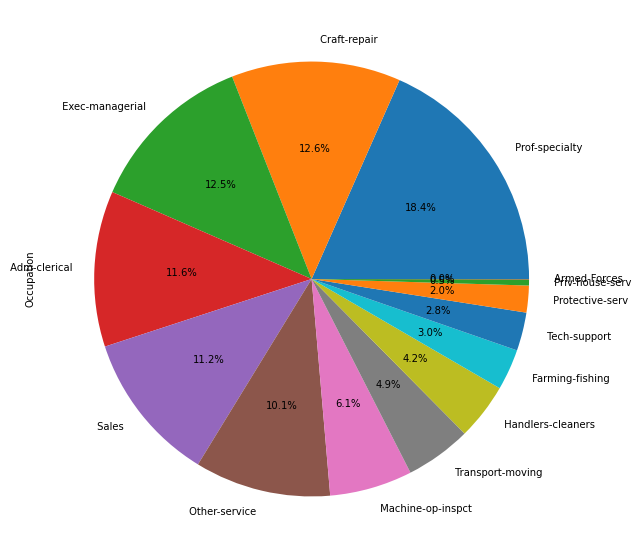

In [67]:
plt.figure(figsize=(15,10))
df['Occupation'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Occupation'].value_counts()

<AxesSubplot:xlabel='Occupation', ylabel='count'>

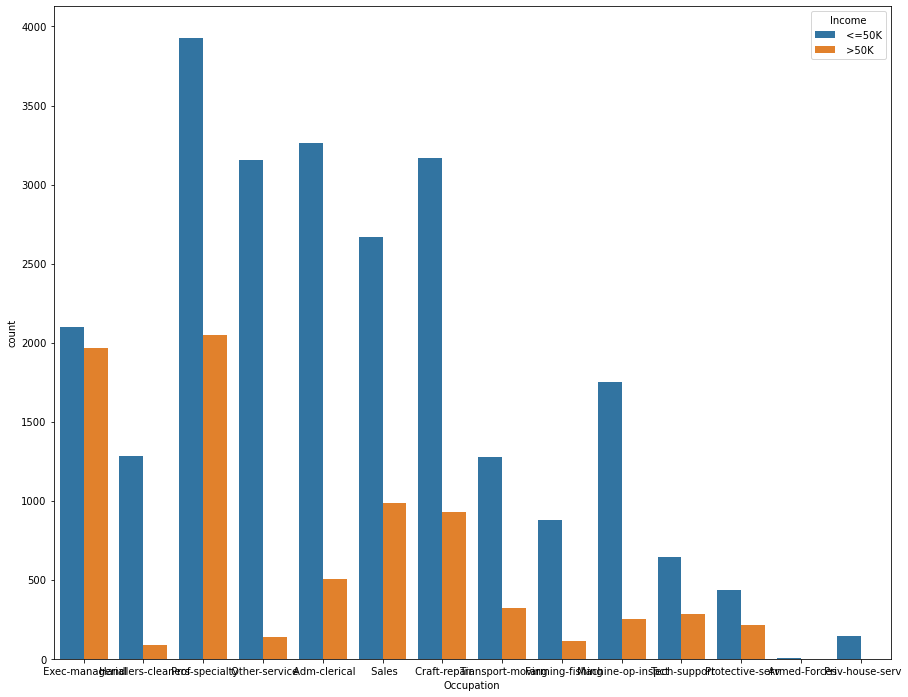

In [57]:
plt.figure(figsize=(15,12))
sns.countplot(x='Occupation',hue='Income',data=df)

# Visualization of Relationship 

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

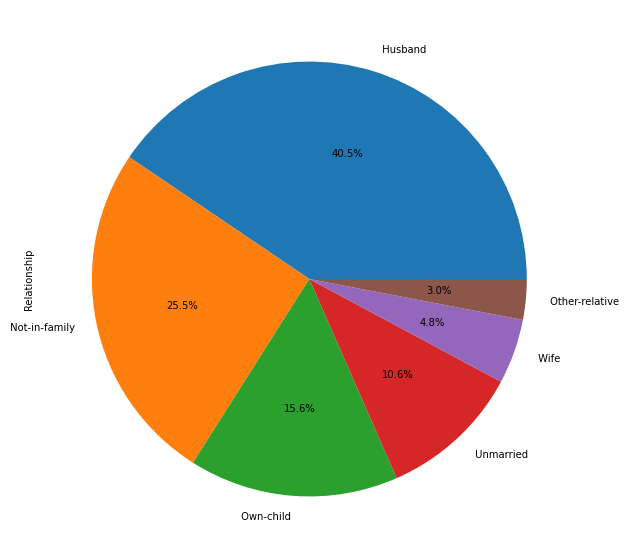

In [66]:
plt.figure(figsize=(12,10))
df['Relationship'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Relationship'].value_counts()

<AxesSubplot:xlabel='Occupation', ylabel='count'>

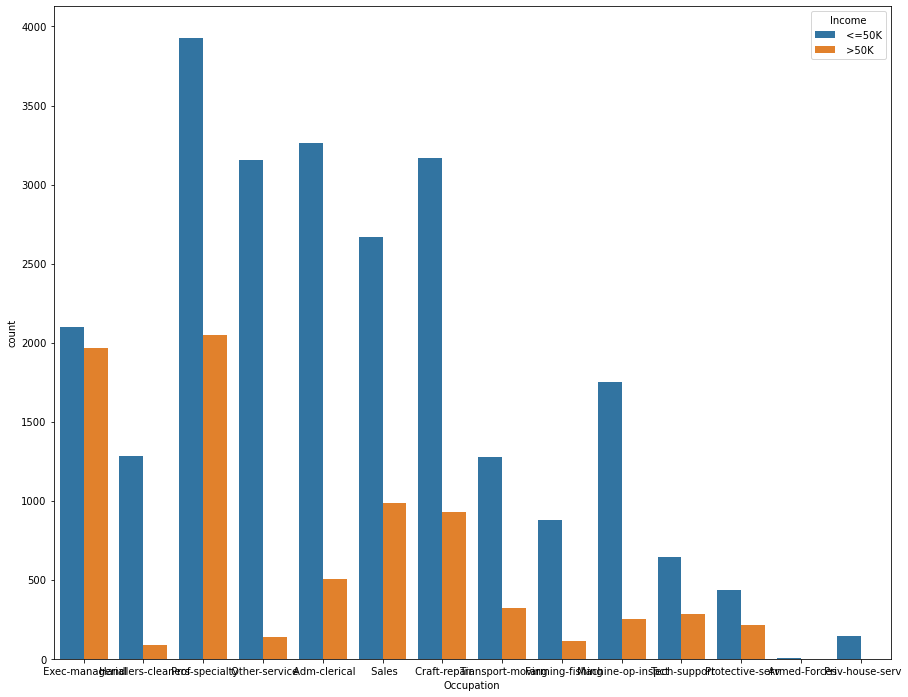

In [59]:
plt.figure(figsize=(15,12))
sns.countplot(x='Occupation',hue='Income',data=df)

# Visualization of Race 

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

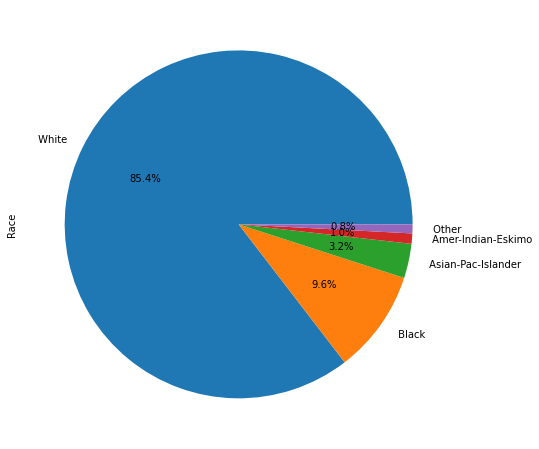

In [65]:
plt.figure(figsize=(12,8))
df['Race'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Race'].value_counts()

<AxesSubplot:xlabel='Race', ylabel='count'>

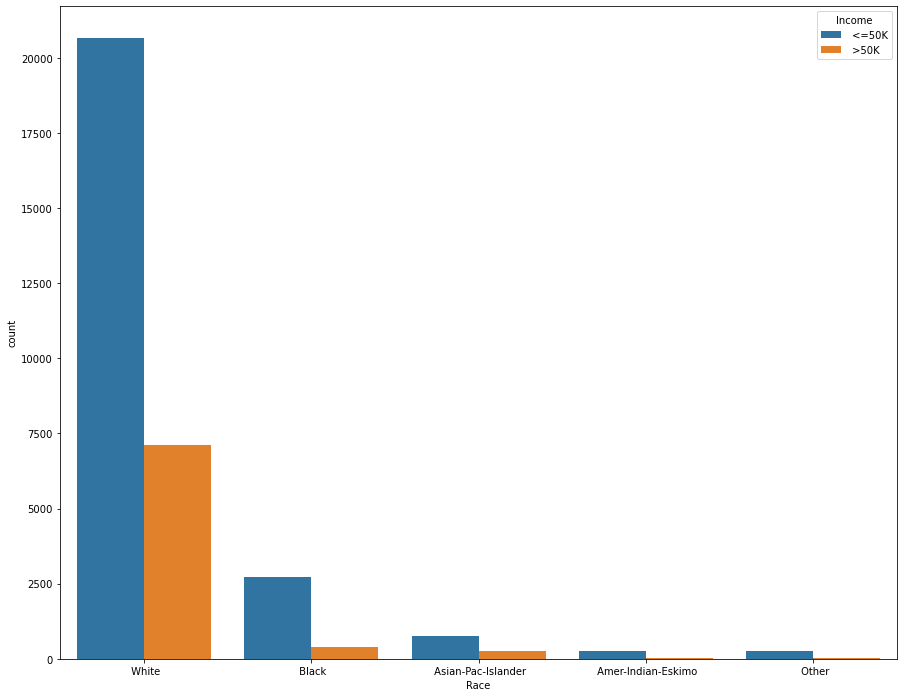

In [61]:
plt.figure(figsize=(15,12))
sns.countplot(x='Race',hue='Income',data=df)

# Visualization of Sex 

 Male      21774
 Female    10762
Name: Sex, dtype: int64

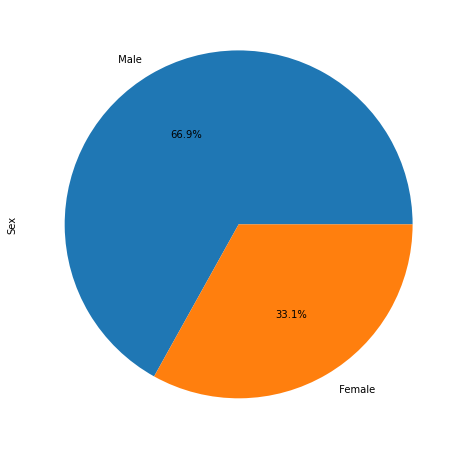

In [64]:
plt.figure(figsize=(12,8))
df['Sex'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['Sex'].value_counts()

<AxesSubplot:xlabel='Sex', ylabel='count'>

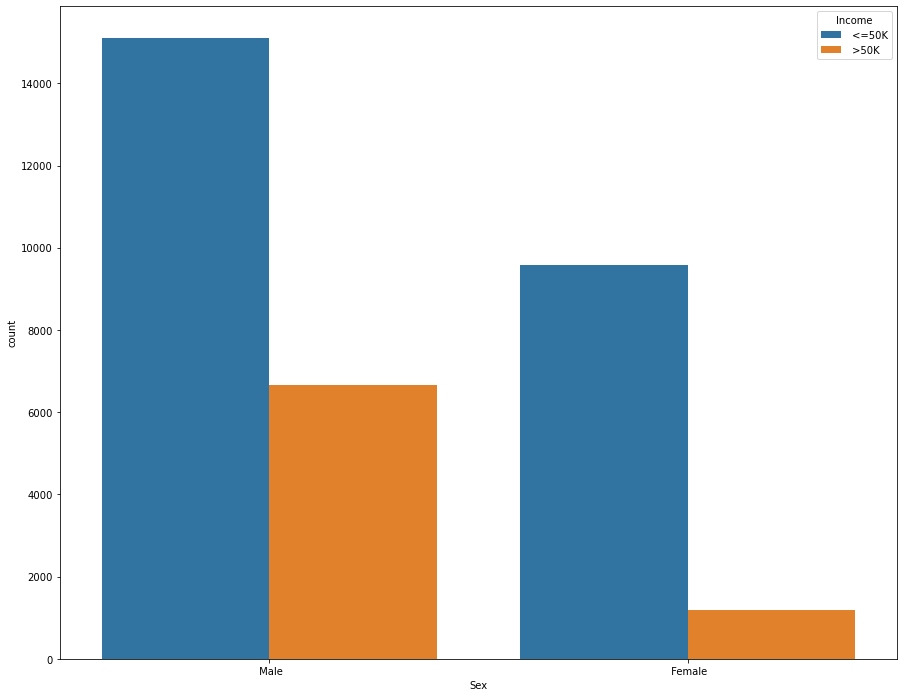

In [63]:
plt.figure(figsize=(15,12))
sns.countplot(x='Sex',hue='Income',data=df)

1. The population contains 67% Males & 33% Females.
2. Income less than & more than 50K is maximum for Male population.

# Checking for Distribution of Numerical Variables

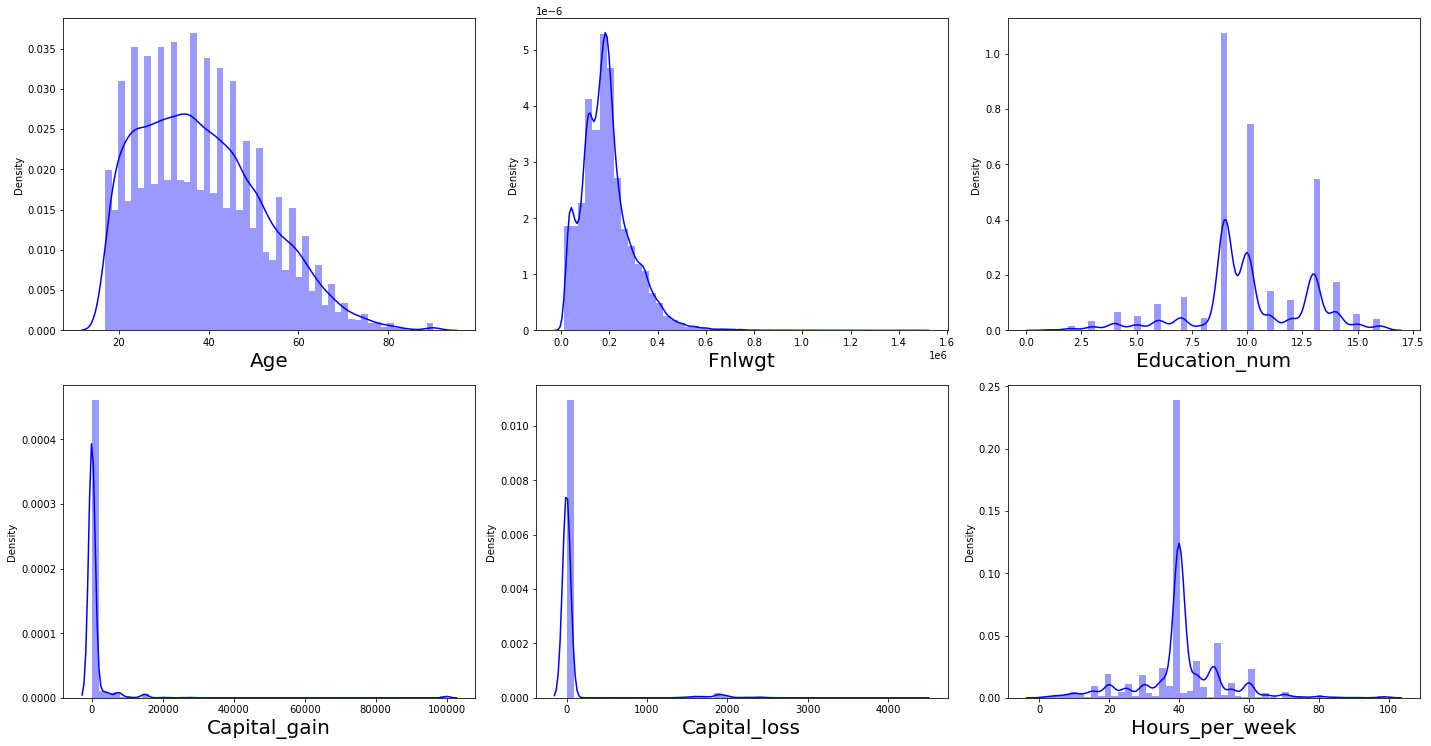

In [70]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Lebel Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,17-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


# Outliers Detection

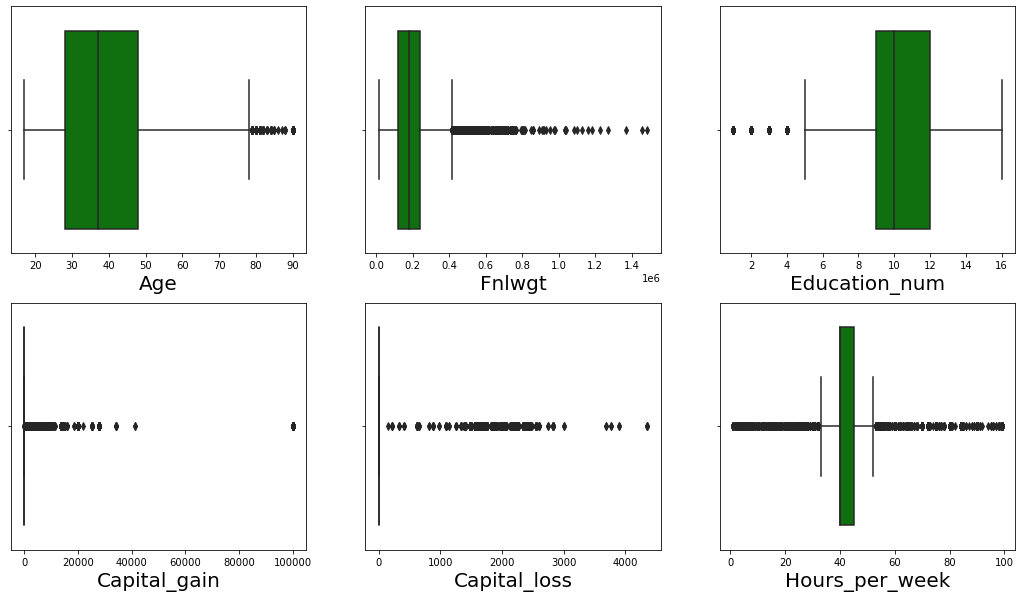

In [72]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

It shows that outliers are present in all numerical features.

# Drop Unnecessary features

In [73]:
df.drop(columns = ["Fnlwgt", "Education"],axis = 1,inplace = True)

In [77]:
df.drop(columns = ["age_group"],axis = 1,inplace = True)

# Outliers Removal

In [78]:
from scipy.stats import zscore

In [79]:
z = np.abs(zscore(df))


In [80]:
df_new= df[(z<3).all(axis = 1)]

# Percent data loss

In [81]:
df.shape,df_new.shape

((32536, 13), (28061, 13))

In [84]:
percent_loss = ((32536-28061)/32536)*100
percent_loss

13.753995574133269

We lost 13.75% of data on outliers removal. It's little big but we can afford it.

# Skewness

In [85]:
df_new.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

Skewness present in features : 
    1. Race
    2. Capital_gain
    3. Capital_loss
    4. Native_country
    5. Income
    6. Relationship
    7. Sex

Since Race,Native_country,Relationship and Sex are categorical features, we will not remove skewness from these features.
Also Income is a target variable, we will not remove it's skewness.
For removing skewness of Capital_gain and Capital_loss we will use scaling of data.

# Correlation

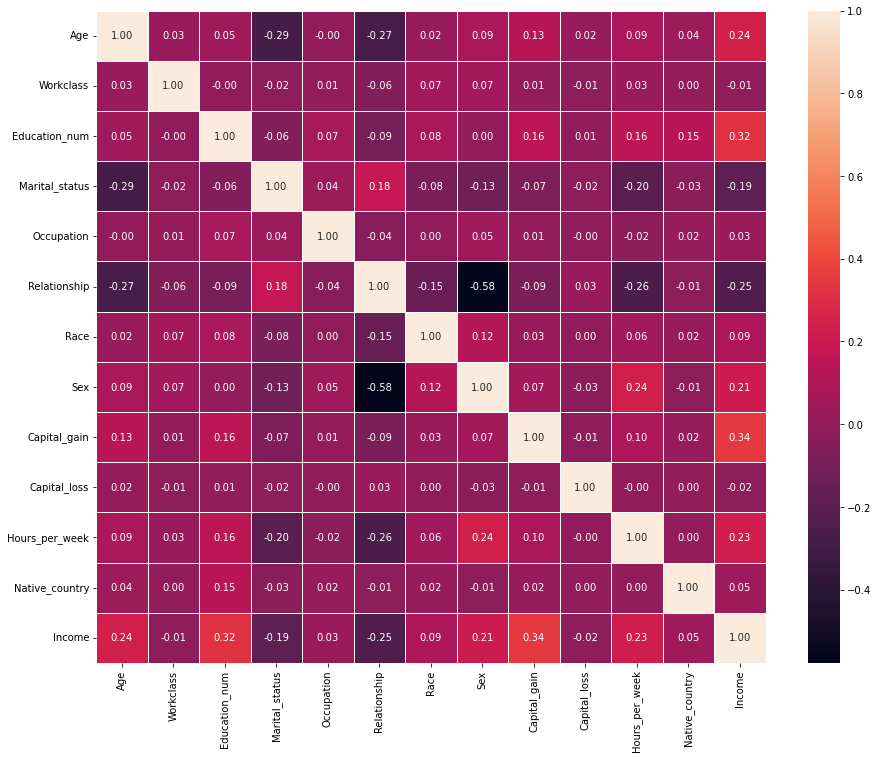

In [86]:
plt.figure(figsize=(15,12))
sns.heatmap(df_new.corr(), annot = True, linewidth=0.5,fmt = '.2f')
plt.show()

In [87]:
df_new.corr()['Income'].sort_values()

Relationship     -0.248263
Marital_status   -0.194146
Capital_loss     -0.016465
Workclass        -0.007699
Occupation        0.030664
Native_country    0.047240
Race              0.094756
Sex               0.211792
Hours_per_week    0.233472
Age               0.241844
Education_num     0.320271
Capital_gain      0.343487
Income            1.000000
Name: Income, dtype: float64

Features 'Capital_loss','Workclass','Occupation','Native_country' and 'Race' are less correlated with target variable
Features 'Education_num' and 'Capital_gain' has good correlation with Income.

# Let's check for Multicollinearity

In [88]:
#Here we will use VIF method to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
vif['Features']= df_new.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


For some of the features, VIF exceed the permissible limit of 10

# Splitting data in target and dependent feature

In [93]:
X = df_new.drop(['Income'], axis =1)
y = df_new['Income']

In [97]:
X

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,13,2,3,0,4,1,0,0,13,38
1,38,3,9,0,5,1,4,1,0,0,40,38
2,53,3,7,2,5,0,2,1,0,0,40,38
4,37,3,14,2,3,5,4,0,0,0,40,38
5,49,3,5,3,7,1,2,0,0,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38
32556,40,3,9,2,6,0,4,1,0,0,40,38
32557,58,3,9,6,0,4,4,0,0,0,40,38
32558,22,3,9,4,0,3,4,1,0,0,20,38


In [98]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 28061, dtype: int32

# Balancing Target Variable

In [103]:
df_new.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

In [104]:
from imblearn.over_sampling import SMOTE

In [106]:
X,y = SMOTE().fit_resample(X,y)

In [107]:
y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

# Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)

# PCA

In [110]:
from sklearn.decomposition import PCA

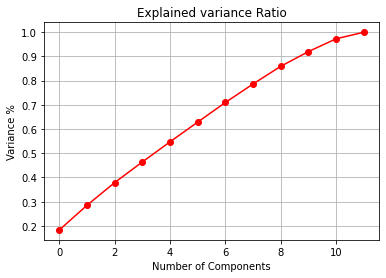

In [112]:
pca = PCA()
x_pca = pca.fit_transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

 AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data. We shall pick the first 9 components for our prediction. 

In [113]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X)

In [114]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Split data into training  and test data

In [115]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=99, test_size=.3)

In [118]:
X_train.shape,y_train.shape

((30473, 9), (30473,))

# Let's check for best random state

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(principle_x,y,test_size = 0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7747492535027946 on Random_state 30


# 1. Logistic Regression Model

In [122]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=30, test_size=.3)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [123]:
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)

In [124]:
print("accuracy_score_lr : ",accuracy_score(y_test,y_pred_lr))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_lr))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_lr))

accuracy_score_lr :  0.7747492535027946


confusion_matrix

 :  [[4939 1573]
 [1369 5180]]


classification_report

 :                precision    recall  f1-score   support

           0       0.78      0.76      0.77      6512
           1       0.77      0.79      0.78      6549

    accuracy                           0.77     13061
   macro avg       0.78      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



# RandomForestClassifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [126]:
y_pred_rf = rf.predict(X_test)

In [127]:
accuracy_score_rf = accuracy_score(y_test,y_pred_rf)

In [128]:
print("accuracy_score_rf : ",accuracy_score(y_test,y_pred_rf))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_rf))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_rf))

accuracy_score_rf :  0.8600413444606079


confusion_matrix

 :  [[5446 1066]
 [ 762 5787]]


classification_report

 :                precision    recall  f1-score   support

           0       0.88      0.84      0.86      6512
           1       0.84      0.88      0.86      6549

    accuracy                           0.86     13061
   macro avg       0.86      0.86      0.86     13061
weighted avg       0.86      0.86      0.86     13061



# Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
y_pred_dt = dt.predict(X_test)

In [132]:
accuracy_score_dt = accuracy_score(y_test,y_pred_dt)

In [133]:
print("accuracy_score_dt : ",accuracy_score(y_test,y_pred_dt))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_dt))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_dt))

accuracy_score_dt :  0.8199984687236812


confusion_matrix

 :  [[5261 1251]
 [1100 5449]]


classification_report

 :                precision    recall  f1-score   support

           0       0.83      0.81      0.82      6512
           1       0.81      0.83      0.82      6549

    accuracy                           0.82     13061
   macro avg       0.82      0.82      0.82     13061
weighted avg       0.82      0.82      0.82     13061



# KNeighborsClassifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
y_pred_knn = knn.predict(X_test)

In [136]:
accuracy_score_knn = accuracy_score(y_test,y_pred_knn)

In [144]:
print("accuracy_score_knn : ",accuracy_score(y_test,y_pred_knn))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_knn))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_knn))

accuracy_score_knn :  0.6007604562737643


confusion_matrix

 :  [[ 8  3  0  1  0  0  2  1]
 [ 1 46  1  8  0  0  4  3]
 [ 0 10  3  6  1  1  1  1]
 [ 0 16  2 59  0  0  0 16]
 [ 0  1  0  1  0  0  0  0]
 [ 1  0  0  2  0  0  0  2]
 [ 2  6  1  1  0  0 23  1]
 [ 0  0  0  9  0  0  0 19]]


classification_report

 :                precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.56      0.73      0.63        63
           2       0.43      0.13      0.20        23
           3       0.68      0.63      0.66        93
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.77      0.68      0.72        34
           7       0.44      0.68      0.54        28

    accuracy                           0.60       263
   macro avg       0.44      0.42      0.42       263
weighted avg       0.60      0.60      0.58       263



# Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score

# 1. Logistic Regression

In [138]:
cv_score_lr = cross_val_score(LogisticRegression(),principle_x, y,cv=5).mean()
cv_score_lr

0.7676989616076864

# 2.RandomForestClassifier

In [139]:
cv_score_rf = cross_val_score(RandomForestClassifier(),principle_x, y,cv=5).mean()
cv_score_rf

0.8582260086263972

# 3. DecisionTreeClassifier

In [140]:
cv_score_dt = cross_val_score(DecisionTreeClassifier(),principle_x, y,cv=5).mean()
cv_score_dt

0.8214960192547164

# 4. KNeighborsClassifier

In [141]:
cv_score_knn = cross_val_score(KNeighborsClassifier(),principle_x, y,cv=5).mean()
cv_score_knn

0.84278980942505

# Result

In [142]:
result = pd.DataFrame({'Model Name':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier'],
                       'Accuracy Score' : [accuracy_score_lr,accuracy_score_rf,accuracy_score_dt,accuracy_score_knn],
                       'Cross Validation SCore' : [cv_score_lr,cv_score_rf,cv_score_dt,cv_score_knn]})
result

,Model Name,Accuracy Score,Cross Validation SCore
0,LogisticRegression,0.774749,0.767699
1,RandomForestClassifier,0.860041,0.858226
2,DecisionTreeClassifier,0.819998,0.821496
3,KNeighborsClassifier,0.849858,0.842790


Since the model DecisionTreeClassifier gives us best accuracy with minimun difference between model accuracy score and cross validation score, we will choose DecisionTreeClassifier as a final model.

# Let's apply Hyperparameter Tuning to this model

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
params = {'max_depth': (3,6,9),
         'criterion':('gini','entropy'),
         'max_depth': (1,4,6,7),
         'max_features': ('auto','sqrt','log2'),
         'min_samples_split': (3,5,8)
         }

In [145]:
clf = GridSearchCV(dt,param_grid = params,cv = 5,verbose = True,n_jobs = -1)

In [146]:
best_clf = clf.fit(principle_x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [147]:
best_clf.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_split=5)

In [148]:
param_accuracy_dt = round(best_clf.score(principle_x,y),3)
param_accuracy_dt

0.807

# Model Saving

In [149]:
import pickle

In [150]:
filename = "CensusIncomePrediction"
pickle.dump(dt,open(filename,'wb'))

# Conclusion

In [152]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

81.99984687236812


In [184]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred_dt[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
Predicted,3,6,0,3,2,1,6,1,3,3,1,7,1,2,3,0,1,1,3,0,6,2,7,1,5,3,7,1,2,6,1,3,6,2,7,3,1,7,2,3,5,2,3,3,6,1,7,3,2,3,1,3,7,3,1,1,3,0,1,7,3,0,2,3,1,7,1,3,1,7,3,3,3,3,3,6,7,1,1,3,3,3,1,3,6,7,3,0,6,1,3,7,3,6,3,1,1,7,3,3,3,3,1,0,7,3,3,3,6,3,2,1,1,1,1,1,7,1,1,1,2,1,3,0,1,3,1,1,7,1,2,3,6,6,1,2,1,7,7,1,3,3,7,3,1,6,3,3,6,6,6,6,3,0,1,1,7,3,1,6,6,3,5,3,1,3,1,3,6,1,3,2,3,2,1,1,6,3,1,3,2,7,3,1,3,3,6,3,3,3,1,7,1,7,3,6,6,1,6,3,3,1,1,3,3,1,3,6,3,1,1,6,3,1,3,6,3,6,1,7,1,3,1,3,1,2,1,3,3,6,1,3,3,3,3,1,0,3,1,3,3,7,3,2,1,1,6,7,3,3,3,6,6,3,2,7,1,3,3,3,3,1,1
Original,3,6,0,3,2,1,6,1,3,3,1,7,1,2,3,0,1,1,3,0,6,2,7,1,5,3,7,1,2,6,1,3,6,2,7,3,1,7,2,3,5,2,3,3,6,1,7,3,2,3,1,3,7,3,1,1,3,0,1,7,3,0,2,3,1,7,1,3,1,7,3,3,3,3,3,6,7,1,1,3,3,3,1,3,6,7,3,0,6,1,3,7,3,6,3,1,1,7,3,3,3,3,1,0,7,3,3,3,6,3,2,1,1,1,1,1,7,1,1,1,2,1,3,0,1,3,1,1,7,1,2,3,6,6,1,2,1,7,7,1,3,3,7,3,1,6,3,3,6,6,6,6,3,0,1,1,7,3,1,6,6,3,5,3,1,3,1,3,6,1,3,2,3,2,1,1,6,3,1,3,2,7,3,1,3,3,6,3,3,3,1,7,1,7,3,6,6,1,6,3,3,1,1,3,3,1,3,6,3,1,1,6,3,1,3,6,3,6,1,7,1,3,1,3,1,2,1,3,3,6,1,3,3,3,3,1,0,3,1,3,3,7,3,2,1,1,6,7,3,3,3,6,6,3,2,7,1,3,3,3,3,1,1
